In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [2]:
coolcats_df = pd.read_csv("coolcats_data.csv", index_col=0)

In [3]:
coolcats_df

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668.0,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744.0,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856.0,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611.0,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004.0,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790.0,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698.0,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227.0,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26


<AxesSubplot:xlabel='created_date'>

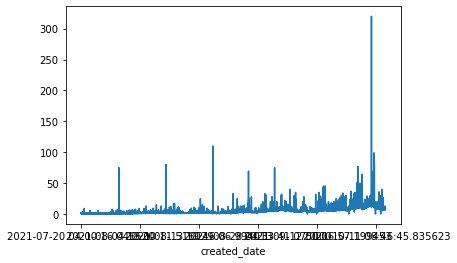

In [4]:
#basic plot function to peep data with no sampling
coolcats_df["total_price_eth"].plot()

The imported CSV needs to be converted to a time series and re-indexed by date again. Let's do this quickly.

In [5]:
coolcats_df.index = pd.to_datetime(coolcats_df.index)


In [6]:
coolcats_df.index

DatetimeIndex(['2021-07-20 04:00:16.046520', '2021-07-20 04:03:27.737959',
               '2021-07-20 04:12:51.292764', '2021-07-20 04:13:29.909525',
               '2021-07-20 04:15:36.898508', '2021-07-20 04:16:54.498247',
               '2021-07-20 04:18:41.559872', '2021-07-20 04:19:02.531511',
               '2021-07-20 04:20:54.626061', '2021-07-20 04:21:43.870821',
               ...
               '2021-10-22 19:24:40.289438', '2021-10-22 19:29:11.447268',
               '2021-10-22 20:25:35.338635', '2021-10-22 20:32:53.337100',
               '2021-10-22 21:39:46.672041', '2021-10-22 21:42:21.243043',
               '2021-10-22 21:58:06.614580', '2021-10-22 22:09:51.133094',
               '2021-10-22 22:46:39.290488', '2021-10-22 23:06:06.671899'],
              dtype='datetime64[ns]', name='created_date', length=10303, freq=None)

<AxesSubplot:xlabel='created_date'>

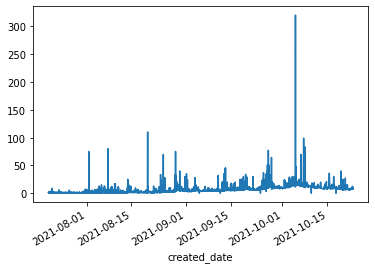

In [7]:
#basic plot function to peep data with no sampling
coolcats_df["total_price_eth"].plot()

In [8]:
#are sales higher at a certain hour?



In [9]:
#explore range of sales - what is the higest and lowest sale price recorded?
coolcats_df["total_price_eth"].max()

319.99999937620635

In [10]:
coolcats_df["total_price_eth"].sort_values()

created_date
2021-07-23 17:43:07.987537      0.000000
2021-08-23 20:58:31.242849      0.000000
2021-10-17 16:38:42.429949      0.000000
2021-08-22 02:09:20.384869      0.000000
2021-07-23 06:07:22.973680      0.000000
                                 ...    
2021-08-07 17:53:11.863650     80.000000
2021-10-08 02:33:58.558948     83.000004
2021-10-07 14:49:07.244063     99.000001
2021-08-20 00:46:48.601628    109.999999
2021-10-05 01:45:03.048370    319.999999
Name: total_price_eth, Length: 10303, dtype: float64

In [11]:
dropthis1 = pd.Timestamp("2021-10-05 01:45:03.048370")

In [12]:
coolcats_df = coolcats_df.drop(dropthis1)

In [13]:
coolcats_df

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668.0,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744.0,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856.0,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611.0,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004.0,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790.0,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698.0,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227.0,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26


In [14]:
coolcats_df["total_price_eth"].min()

0.0

I need to eliminate the 319 ETH purchase as it is a significant outlier that is distorting the distribution of our data. I also want to eliminate all sales with a 0 ETH sale value as these were most likely transfers between wallets or private trades. 

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_price_eth', ylabel='Density'>

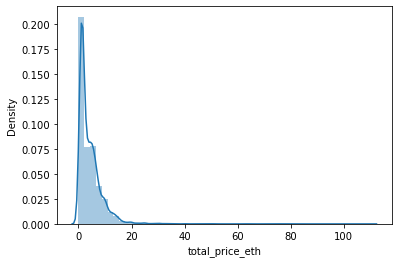

In [15]:
sns.distplot(coolcats_df["total_price_eth"])

<AxesSubplot:xlabel='created_date'>

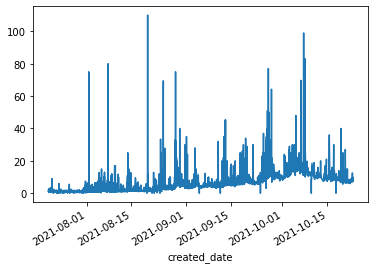

In [16]:
coolcats_df["total_price_eth"].plot()

In [17]:
coolcats_df.loc[coolcats_df["total_price_eth"] == 0.0]

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-07-22 19:31:54.575062,329106118,1,0.0,30223748.0,1420.0,4.0,Cool Cat #1420,0x34eced1a67b27cbec2dca6f50f00e251111f2587,0xa8d9cd857e8676cd7db00afdff1a912c16721e34a2cf...,12878082,139138251,2021-07-22T19:31:15,0x798d0c87bcae0e90bbb0771ca04a6915be36ac64032c...,47,0x6df54f285015617c912fb24b2386f552f6382f8c
2021-07-23 06:07:22.973680,331296507,1,0.0,30237269.0,4999.0,7.0,Cool Cat #4999,0x9163a9d4bba4ab3e76265f6cac86d2962b5f53de,0x7167e3e5e172c3c56033fa0f82dfe431e8641a2f2084...,12880928,139297970,2021-07-23T06:06:57,0xef2834522e4a8cef71431517cb2f53197f910fffe00f...,146,0x7cea66d7bc4856f90b94a3c1ea0229b86aa3697a
2021-07-23 17:43:07.987537,333258913,1,0.0,30242886.0,6899.0,3.0,Cool Cat #6899,0xee91187b423739e33a6bcf1c77d2e795140d336a,0x7dee2f1b00058999527477a6524d45e7389505d1b854...,12884013,139468348,2021-07-23T17:42:31,0x0bbb2b3df6e6988dc084a9d2ef2def24cc6995c12f24...,282,0x2d06ec78d357b2cf84b7c00416051b933dab472a
2021-08-19 20:01:58.927241,574372833,1,0.0,30227088.0,2579.0,4.0,Cool Cat #2579,0x0df7c774427a39e2b4e585a3b530ee0e7e817411,0x35d7fb37e3cf475faa7f3eae8844bd617726d2c93f8a...,13057754,150326197,2021-08-19T20:01:06,0x317fb457a47f238c59174b5f0800988266cf5ac7449a...,159,0xe724e14c6b7599b710804df390e39928abfed082
2021-08-21 09:36:41.019275,590350198,1,0.0,30235333.0,4188.0,4.0,Cool Cat #4188,0x6d278bb7f397de6f91419db71512bf27c8c39dad,0x00c8975411383bbd11ddbdd434864191d9dedf02712a...,13067850,151041989,2021-08-21T09:36:06,0xe4662bd5f02ae5cbb4571e60d120c0d1bfaf28f3356c...,249,0x46873897f487119f34ffde1e6819dbda90cf8acd
2021-08-22 02:09:20.384869,596050305,1,0.0,30241444.0,6301.0,4.0,Cool Cat #6301,0xcec8849779e089e5d989bc857d2f052bedf63a7e,0x43e1983ec55b4db2721613f98908a3208c1bbb24587e...,13072312,151393614,2021-08-22T02:09:01,0x1b567aa124204839e230955b182990172b7d62ade5cd...,69,0xce757ff5a71db99581cd4abb2e4a4eedb453886a
2021-08-23 20:57:41.776965,616288535,1,0.0,30221455.0,426.0,10.0,Cool Cat #426,0xec96bf62c6a315aae337ed8cf7d42cb25c6af85d,0x1e59d12b6af7aaeaa31f03dbeb4b2327805dab8208cc...,13083861,152407341,2021-08-23T20:57:05,0x98aa0f53422428f1abeb5c12126684713d132cc94cd3...,0,0x283949d7c2ad3c8bca304df6aa5d9a2a78e02b77
2021-08-23 20:58:31.242849,616296714,1,0.0,30239449.0,5738.0,3.0,Cool Cat #5738,0xec96bf62c6a315aae337ed8cf7d42cb25c6af85d,0xad307795175ff2778a618b292c13c303fd66de4d6066...,13083865,152407724,2021-08-23T20:57:48,0xc3289a126f510893964c709310b016d1259c96d6fa77...,239,0x6b611d278233cb7ca76fd5c08579c3337c01e577
2021-09-05 02:58:26.067136,760307589,1,0.0,30215539.0,130.0,4.0,Cool Cat #130,0x37c6503732e8c8b9af50bd3755c3530f6b032dfd,0xc06385b3a232dcdfa3269823f8c6934785efec10c847...,13163163,159102854,2021-09-05T02:58:13,0x382eb8812780fd74f651f836ce94a0be0924aefe0ef2...,37,0xcd8cf64b220e3d10fbb175a22be7c42e8aca0014


In [18]:
dropthese2 = coolcats_df[coolcats_df["total_price_eth"] == 0.0]

In [19]:
coolcats_df.drop(dropthese2.index, inplace=True)

In [20]:
coolcats_df["total_price_eth"].sort_values()

created_date
2021-07-21 15:37:41.641731    1.000000e-11
2021-07-22 20:51:30.327154    1.950000e-09
2021-10-10 00:08:50.265261    1.000000e-03
2021-07-30 12:36:30.086024    5.700000e-02
2021-07-26 01:11:53.599113    6.190000e-02
                                  ...     
2021-09-26 15:02:15.850159    7.700000e+01
2021-08-07 17:53:11.863650    8.000000e+01
2021-10-08 02:33:58.558948    8.300000e+01
2021-10-07 14:49:07.244063    9.900000e+01
2021-08-20 00:46:48.601628    1.100000e+02
Name: total_price_eth, Length: 10289, dtype: float64

<AxesSubplot:xlabel='created_date'>

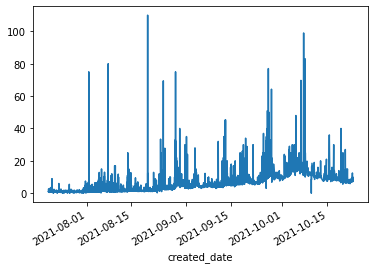

In [21]:
coolcats_df["total_price_eth"].plot()

In [22]:
adfuller(coolcats_df["total_price_eth"])

(-2.842388618483803,
 0.05246930503883227,
 36,
 10252,
 {'1%': -3.430988015811043,
  '5%': -2.8618219657992143,
  '10%': -2.5669200852512013},
 54877.76619902332)

In [23]:
coolcats_df_viz = coolcats_df

In [24]:
coolcats_df_viz["year"] = coolcats_df_viz.index.year
coolcats_df_viz["month"] = coolcats_df_viz.index.month
coolcats_df_viz["hour"] = coolcats_df_viz.index.hour
coolcats_df_viz["weekday"] = coolcats_df_viz.index.day_name()

In [25]:
coolcats_df_viz

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address,year,month,hour,weekday
created_date,,,,,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668.0,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934,2021,7,4,Tuesday
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744.0,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06,2021,7,4,Tuesday
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856.0,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6,2021,7,4,Tuesday
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611.0,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7,2021,7,4,Tuesday
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004.0,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a,2021,7,4,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790.0,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad,2021,10,21,Friday
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698.0,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580,2021,10,21,Friday
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227.0,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26,2021,10,22,Friday


In [26]:
#lets plot this data a few different ways to get an understanding of what drives sales volume 

In [27]:
weekdays = coolcats_df_viz["weekday"].value_counts()

<AxesSubplot:ylabel='weekday'>

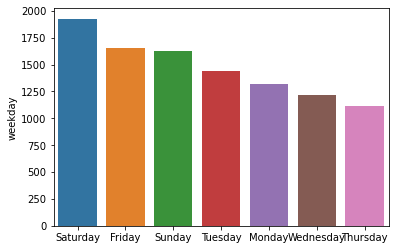

In [28]:
fig, ax = plt.subplots()

x = weekdays.index
y = weekdays
sns.barplot(x=x, y=y)

We can see that the most sales transactions for this collection happen over the weekend days. What about hourly?

In [29]:
hourcounts = coolcats_df_viz["hour"].value_counts()

<AxesSubplot:ylabel='hour'>

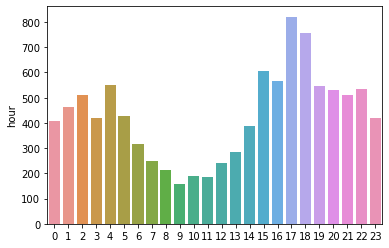

In [30]:
fig, ax = plt.subplots()

x = hourcounts.index
y = hourcounts
sns.barplot(x=x, y=y)

In [31]:
hourcounts.sort_values(ascending=False)

17    821
18    758
15    605
16    566
4     550
19    547
22    534
20    531
21    509
2     509
1     464
5     428
23    420
3     419
0     406
14    386
6     316
13    283
7     249
12    243
8     213
10    188
11    185
9     159
Name: hour, dtype: int64

There appears to be significantly higher sales volume during the later hours of the day, so considering the hour of the sale may be essential to our predictions.

In [32]:
coolcatshourly = coolcats_df_viz["total_price_eth"].resample('H').mean()

In [33]:
coolcatshourly [:20]

created_date
2021-07-20 04:00:00    0.944952
2021-07-20 05:00:00    1.022286
2021-07-20 06:00:00    1.040000
2021-07-20 07:00:00    0.835000
2021-07-20 08:00:00    0.923333
2021-07-20 09:00:00    0.705000
2021-07-20 10:00:00    0.810000
2021-07-20 11:00:00    1.327000
2021-07-20 12:00:00    0.924950
2021-07-20 13:00:00    1.153333
2021-07-20 14:00:00         NaN
2021-07-20 15:00:00    1.343333
2021-07-20 16:00:00    0.874500
2021-07-20 17:00:00    1.421750
2021-07-20 18:00:00    0.882333
2021-07-20 19:00:00    1.121668
2021-07-20 20:00:00    1.029750
2021-07-20 21:00:00    0.874000
2021-07-20 22:00:00    0.943333
2021-07-20 23:00:00    1.307347
Freq: H, Name: total_price_eth, dtype: float64

<AxesSubplot:xlabel='created_date'>

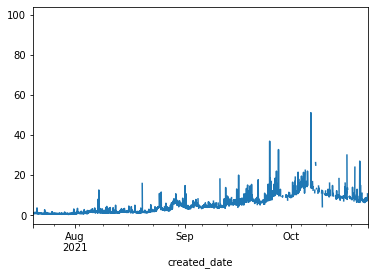

In [34]:
coolcatshourly.plot()

Looks more stationary, can see that there are some gaps now due to downsampling. Need to fill these, I will try forward filling and interpolation as my strategies. Since sales seem to have cycles of spikes and consolidation, I think either of these could make our data more stationary.

In [35]:
#check values before interpolation
coolcatshourly.sort_values(ascending=False)

created_date
2021-10-07 14:00:00    99.000001
2021-10-06 18:00:00    51.137999
2021-09-25 02:00:00    36.941999
2021-10-15 14:00:00    36.000001
2021-09-27 14:00:00    32.756667
                         ...    
2021-10-21 15:00:00          NaN
2021-10-21 16:00:00          NaN
2021-10-22 02:00:00          NaN
2021-10-22 09:00:00          NaN
2021-10-22 18:00:00          NaN
Name: total_price_eth, Length: 2276, dtype: float64

In [36]:
coolcatshourly.max()

99.00000057667194

In [37]:
coolcatshourlyffill = coolcatshourly.ffill()

In [38]:
#adfuller results of FFILL dataset is decent
adfuller(coolcatshourlyffill)

(-2.799956617439017,
 0.058279965225991874,
 24,
 2251,
 {'1%': -3.433258384187781,
  '5%': -2.862824846221197,
  '10%': -2.567453983958164},
 11832.403112601136)

<AxesSubplot:xlabel='created_date'>

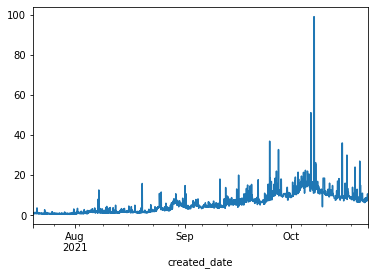

In [39]:
coolcatshourlyffill.plot()

In [40]:
coolcatshourlyffill.sort_values()

created_date
2021-07-30 12:00:00     0.415333
2021-07-30 03:00:00     0.450000
2021-07-29 19:00:00     0.450500
2021-07-25 00:00:00     0.450633
2021-07-31 18:00:00     0.461050
                         ...    
2021-10-06 18:00:00    51.137999
2021-10-07 17:00:00    99.000001
2021-10-07 15:00:00    99.000001
2021-10-07 14:00:00    99.000001
2021-10-07 16:00:00    99.000001
Name: total_price_eth, Length: 2276, dtype: float64

In [41]:
#lets compare this to if we do interpolation
coolcatshourlyint = coolcatshourly.interpolate()

In [42]:
adfuller(coolcatshourlyint)

(-2.353665875410897,
 0.15524298860666452,
 24,
 2251,
 {'1%': -3.433258384187781,
  '5%': -2.862824846221197,
  '10%': -2.567453983958164},
 10890.338346435186)

coolcatshourlyffill (forward fill) data is significantly more stationary than interpolated data in this case. perhaps we can try one more attempt at bettering that score with a backfill.

In [43]:
coolcatshourlybfill = coolcatshourly.bfill()

In [44]:
adfuller(coolcatshourlybfill)

(-2.278959369832954,
 0.17884380840516817,
 18,
 2257,
 {'1%': -3.4332506437303727,
  '5%': -2.862821428356964,
  '10%': -2.5674521641880554},
 11603.564770679324)

Ok, forward fill has the best results, which makes sense considering price is expected to grow as a collection develops!

<AxesSubplot:xlabel='created_date'>

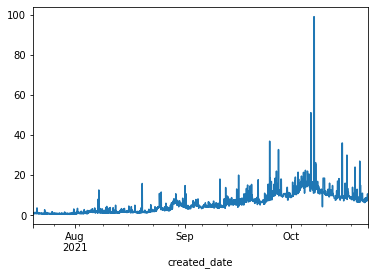

In [45]:
coolcatshourlyffill.plot()

In [46]:
coolcatshourlyffill.sort_values()

created_date
2021-07-30 12:00:00     0.415333
2021-07-30 03:00:00     0.450000
2021-07-29 19:00:00     0.450500
2021-07-25 00:00:00     0.450633
2021-07-31 18:00:00     0.461050
                         ...    
2021-10-06 18:00:00    51.137999
2021-10-07 17:00:00    99.000001
2021-10-07 15:00:00    99.000001
2021-10-07 14:00:00    99.000001
2021-10-07 16:00:00    99.000001
Name: total_price_eth, Length: 2276, dtype: float64

There is a huge gap in the max values in our data. I will certainly consider these 99 eth sales outliers and remove them.

In [47]:
droplist1 = pd.Timestamp("2021-10-07 17:00:00")
droplist2 = pd.Timestamp("2021-10-07 15:00:00")
droplist3 = pd.Timestamp("2021-10-07 14:00:00")
droplist4 = pd.Timestamp("2021-10-07 16:00:00")

cc_hourly_ready = coolcatshourlyffill.drop(droplist1)
cc_hourly_ready = cc_hourly_ready.drop(droplist2)
cc_hourly_ready = cc_hourly_ready.drop(droplist3)
cc_hourly_ready = cc_hourly_ready.drop(droplist4)


In [48]:
cc_hourly_ready.sort_values()

created_date
2021-07-30 12:00:00     0.415333
2021-07-30 03:00:00     0.450000
2021-07-29 19:00:00     0.450500
2021-07-25 00:00:00     0.450633
2021-07-31 18:00:00     0.461050
                         ...    
2021-10-15 15:00:00    36.000001
2021-10-15 14:00:00    36.000001
2021-10-15 16:00:00    36.000001
2021-09-25 02:00:00    36.941999
2021-10-06 18:00:00    51.137999
Name: total_price_eth, Length: 2272, dtype: float64

<AxesSubplot:xlabel='created_date'>

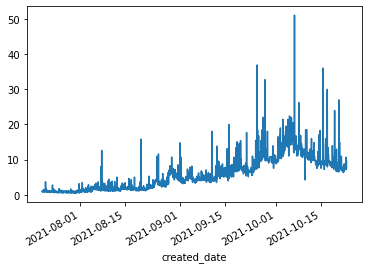

In [49]:
cc_hourly_ready.plot()

In [50]:
adfuller(cc_hourly_ready)

(-1.5660396129024248,
 0.5006268797420571,
 27,
 2244,
 {'1%': -3.433267467097435,
  '5%': -2.862828856845257,
  '10%': -2.567456119332679},
 10089.497694922464)

Okay, removing outliers made my adfuller score much worse which is weird........
I am going to need to revisit this. For now I am going to model with the FFILL data set. Let's save this as an easier name.

In [51]:
hourly_data_final = coolcatshourlyffill

I want to see if this cyclical looking pattern in our data is synonymous with the movement of Ethereum closing prices per day. I downloaded historical data from Yahoo Finance for ETH prices for the same dates as my Cool Cats data.

In [52]:
yahoo_eth = pd.read_csv("ETH-USD.csv")

In [53]:
yahoo_eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-20,1819.082031,1836.998047,1722.050781,1787.510742,1787.510742,17368597636
1,2021-07-21,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,21253359756
2,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,17495480331
3,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,16200392492
4,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,16057446601
...,...,...,...,...,...,...,...
60,2021-09-18,3397.422852,3540.807617,3371.892334,3432.018311,3432.018311,15995220233
61,2021-09-19,3433.287842,3448.322021,3286.172363,3329.447998,3329.447998,14257609743
62,2021-09-20,3329.670654,3343.325439,2940.839111,2958.993408,2958.993408,27371684581
63,2021-09-21,2977.310547,3101.697510,2676.407471,2764.431152,2764.431152,30405062665


In [54]:
yahoo_eth["Date"] = pd.to_datetime(yahoo_eth["Date"])

In [55]:
yahoo_eth.set_index("Date", inplace=True)

In [56]:
yahoo_eth

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-20,1819.082031,1836.998047,1722.050781,1787.510742,1787.510742,17368597636
2021-07-21,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,21253359756
2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,17495480331
2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,16200392492
2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,16057446601
...,...,...,...,...,...,...
2021-09-18,3397.422852,3540.807617,3371.892334,3432.018311,3432.018311,15995220233
2021-09-19,3433.287842,3448.322021,3286.172363,3329.447998,3329.447998,14257609743
2021-09-20,3329.670654,3343.325439,2940.839111,2958.993408,2958.993408,27371684581


In [57]:
coolcatsdaily = coolcats_df_viz["total_price_eth"].resample('D').mean()

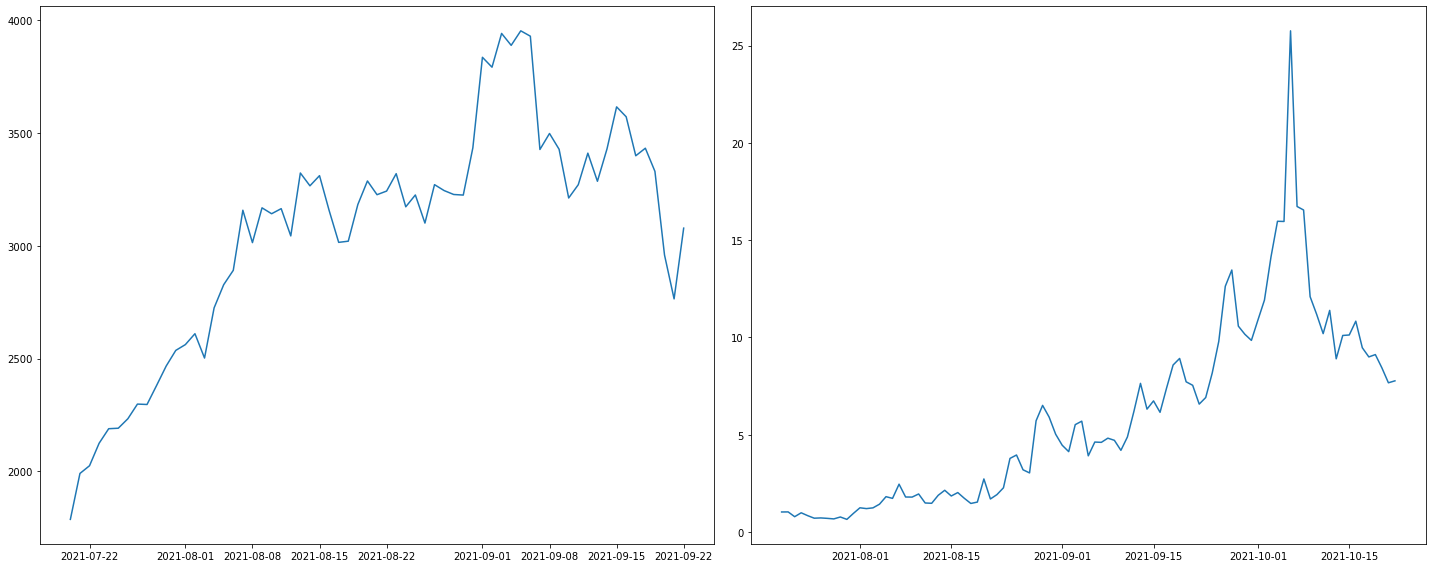

In [58]:
# compare ETH price vs data plot
fig, axes = plt.subplots(1,2, figsize=(20,8))

axes[0].plot(yahoo_eth["Close"])
axes[1].plot(coolcatsdaily)
fig.tight_layout()

Need to begin removing the trend and build model on stationarized data

In [59]:
cc_ts = coolcats_df["total_price_eth"]

<AxesSubplot:xlabel='created_date'>

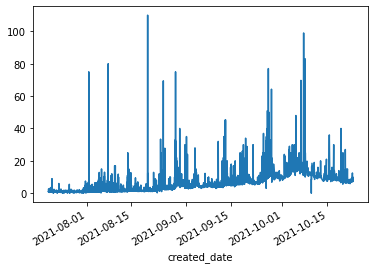

In [60]:
cc_ts.plot()

In [61]:
stattest = adfuller(cc_ts)

In [62]:
display(stattest)

(-2.842388618483803,
 0.05246930503883227,
 36,
 10252,
 {'1%': -3.430988015811043,
  '5%': -2.8618219657992143,
  '10%': -2.5669200852512013},
 54877.76619902332)

The p value is pretty low at .05, where the significance level standard typically is .05.

### possibly use this code later to level up stationarity but not at this moment because our data is already pretty stationary 

In [63]:
diff_cc = cc_ts.diff().dropna()

In [64]:
adfuller(diff_cc)


(-29.539472258746958,
 0.0,
 35,
 10252,
 {'1%': -3.430988015811043,
  '5%': -2.8618219657992143,
  '10%': -2.5669200852512013},
 54879.531211377114)

This is completely stationary at this point but I need to ask instructors if i NEED to downsample?? I am going to try modeling on the hourly downsampled for now.

<AxesSubplot:xlabel='created_date'>

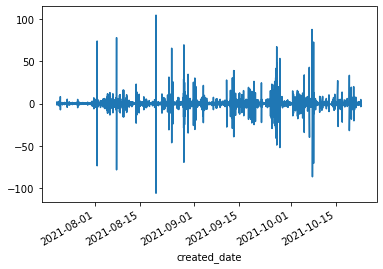

In [65]:
diff_cc.plot()

### end temp code

### begin modeling process

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
hourly_data_final

created_date
2021-07-20 04:00:00     0.944952
2021-07-20 05:00:00     1.022286
2021-07-20 06:00:00     1.040000
2021-07-20 07:00:00     0.835000
2021-07-20 08:00:00     0.923333
                         ...    
2021-10-22 19:00:00    10.650000
2021-10-22 20:00:00     7.230000
2021-10-22 21:00:00     8.063333
2021-10-22 22:00:00     9.800000
2021-10-22 23:00:00     7.500000
Freq: H, Name: total_price_eth, Length: 2276, dtype: float64

<AxesSubplot:xlabel='created_date'>

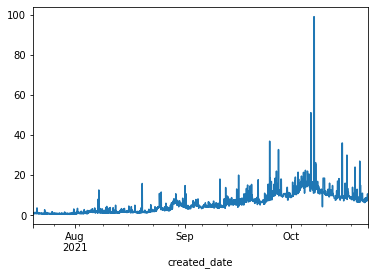

In [68]:
hourly_data_final.plot()

In [69]:
adfuller(hourly_data_final)

(-2.799956617439017,
 0.058279965225991874,
 24,
 2251,
 {'1%': -3.433258384187781,
  '5%': -2.862824846221197,
  '10%': -2.567453983958164},
 11832.403112601136)

In [70]:
### create a baseline

In [71]:
# find the index which allows us to split off 20% of the data
cutoff = round(hourly_data_final.shape[0]*0.8)
cutoff

1821

In [72]:
train = hourly_data_final[:cutoff]

test = hourly_data_final[cutoff:]

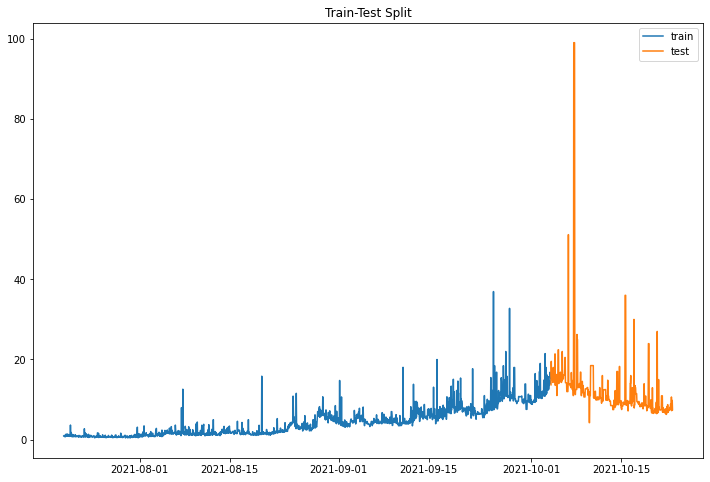

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [74]:
train

created_date
2021-07-20 04:00:00     0.944952
2021-07-20 05:00:00     1.022286
2021-07-20 06:00:00     1.040000
2021-07-20 07:00:00     0.835000
2021-07-20 08:00:00     0.923333
                         ...    
2021-10-03 20:00:00    14.566250
2021-10-03 21:00:00    13.940000
2021-10-03 22:00:00    16.850000
2021-10-03 23:00:00    15.707500
2021-10-04 00:00:00    15.426633
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

In [75]:
#The ARIMA model will turn these back into relevant price predictions when we specify the "levels" type (since differencing impacted the numbers). 
#nvm remove this because we didnt diff() here, but we probably need to

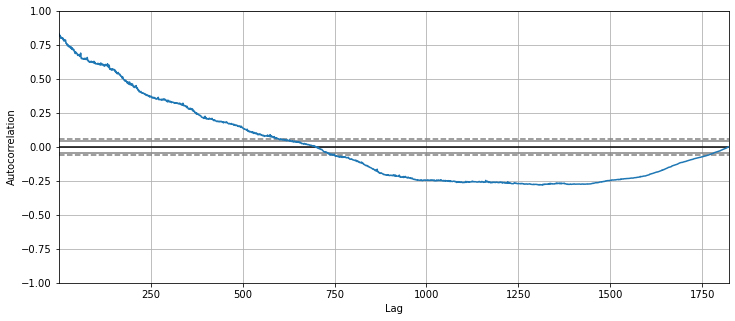

In [76]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(train);

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


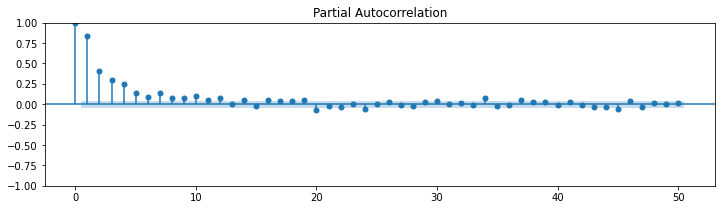

In [77]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,3))
plot_pacf(train,ax=ax, lags=50);

Begin Baseline

In [78]:
naivebaseline = train.shift(1)

In [79]:
naivebaseline

created_date
2021-07-20 04:00:00          NaN
2021-07-20 05:00:00     0.944952
2021-07-20 06:00:00     1.022286
2021-07-20 07:00:00     1.040000
2021-07-20 08:00:00     0.835000
                         ...    
2021-10-03 20:00:00    13.776000
2021-10-03 21:00:00    14.566250
2021-10-03 22:00:00    13.940000
2021-10-03 23:00:00    16.850000
2021-10-04 00:00:00    15.707500
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

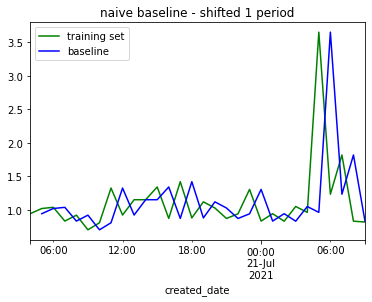

In [80]:
fig, ax = plt.subplots()
train[0:30].plot(ax=ax, c='g', label='training set')
naivebaseline[0:30].plot(ax=ax, c='b', label='baseline')
ax.set_title('naive baseline - shifted 1 period')
ax.legend();

Baseline RMSE :

In [81]:
np.sqrt(mean_squared_error(train[1:], naivebaseline.dropna()))

2.195527638889869

In [82]:
ar_1 = ARIMA(train, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')

created_date
2021-07-20 04:00:00     0.000000
2021-07-20 05:00:00     0.944950
2021-07-20 06:00:00     0.986798
2021-07-20 07:00:00     1.031871
2021-07-20 08:00:00     0.929073
                         ...    
2021-10-03 20:00:00    14.013018
2021-10-03 21:00:00    14.203610
2021-10-03 22:00:00    14.227381
2021-10-03 23:00:00    15.514623
2021-10-04 00:00:00    16.231785
Freq: H, Name: predicted_mean, Length: 1821, dtype: float64

In [83]:
ar1_pred = ar_1.predict(typ='levels')

In [84]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        total_price_eth   No. Observations:                 1821
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3798.430
Date:                Wed, 01 Dec 2021   AIC                           7600.859
Time:                        15:51:49   BIC                           7611.872
Sample:                    07-20-2021   HQIC                          7604.922
                         - 10-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4589      0.005    -92.082      0.000      -0.469      -0.449
sigma2         3.8041      0.026    146.064      0.000       3.753       3.855
===================================================================================
Ljung-Box (L1) (Q):                  42.42   Jarque-Bera (JB):            155689.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.51   Skew:                             2.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
np.sqrt(mean_squared_error(train, ar1_pred))

1.950012213609616

A little better than the naive baseline but not great...

In [86]:
#coefficient indicates a negative relationship is in effect in this model between last week and next week

In [87]:
random_walk_1 = ARIMA(train, order=(0, 1, 0)).fit() #just specifying a first difference, and evaluate model performance

random_walk_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        total_price_eth   No. Observations:                 1821
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4013.757
Date:                Wed, 01 Dec 2021   AIC                           8029.514
Time:                        15:51:49   BIC                           8035.020
Sample:                    07-20-2021   HQIC                          8031.545
                         - 10-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.8203      0.032    152.101      0.000       4.758       4.882
===================================================================================
Ljung-Box (L1) (Q):                 384.34   Jarque-Bera (JB):            180952.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.88   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
rw_pred = random_walk_1.predict()

In [89]:
np.sqrt(mean_squared_error(train, rw_pred))

2.1950364193842544

Worse! But the AIC scores are better than ARIMA?

In [90]:
#compare AIC scores of random walk model versus first ARIMA model

print(f"Random walk:  {random_walk_1.aic}")
print(f"ARIMA 1:  {ar_1.aic}")

Random walk:  8029.513796235779
ARIMA 1:  7600.859116912391


In [91]:
adfuller(train)

(0.27062648145866763,
 0.9759559764058526,
 19,
 1801,
 {'1%': -3.4339861159726306,
  '5%': -2.863146142843122,
  '10%': -2.5676250581282964},
 6954.629424923474)

Ok... so my hourly data was nice and stationary, and then splitting into train and test ruined that...

In [92]:
adfuller(train.diff()[1:])

(-15.024963391046898,
 1.0095447259240202e-27,
 18,
 1801,
 {'1%': -3.4339861159726306,
  '5%': -2.863146142843122,
  '10%': -2.5676250581282964},
 6949.842650575566)

The differenced series is a no-brainer for stationarity, but I am concerned about getting accurate price predictions with this technique. 

In [93]:
ar_1_diff = ARIMA(train.diff()[1:], order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar1diffpred = ar_1_diff.predict(typ='levels')

In [94]:
np.sqrt(mean_squared_error(train[1:], ar1diffpred))

5.960606259029377

Based on my findings, I have decided to select the RMSE as my metric since there are many different ways I can measure the accuracy of my model but they are all going to be measuring very different things, and intuitively I think RMSE is best because we are concerned with profit. I also want to perform an autoarima assessment to get an idea of different models I can try. 

In [95]:
train_diff = train.diff().dropna()

In [96]:
train

created_date
2021-07-20 04:00:00     0.944952
2021-07-20 05:00:00     1.022286
2021-07-20 06:00:00     1.040000
2021-07-20 07:00:00     0.835000
2021-07-20 08:00:00     0.923333
                         ...    
2021-10-03 20:00:00    14.566250
2021-10-03 21:00:00    13.940000
2021-10-03 22:00:00    16.850000
2021-10-03 23:00:00    15.707500
2021-10-04 00:00:00    15.426633
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

In [97]:
np.exp(-0.205000)

0.8146473164114145

In [98]:
train_diff

created_date
2021-07-20 05:00:00    0.077333
2021-07-20 06:00:00    0.017714
2021-07-20 07:00:00   -0.205000
2021-07-20 08:00:00    0.088333
2021-07-20 09:00:00   -0.218333
                         ...   
2021-10-03 20:00:00    0.790250
2021-10-03 21:00:00   -0.626250
2021-10-03 22:00:00    2.910000
2021-10-03 23:00:00   -1.142500
2021-10-04 00:00:00   -0.280867
Freq: H, Name: total_price_eth, Length: 1820, dtype: float64

<AxesSubplot:xlabel='created_date'>

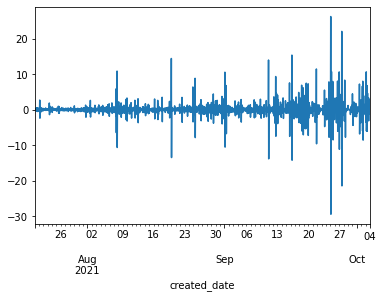

In [99]:
train_diff.plot()

In [100]:
adfuller(train_diff)

(-15.024963391046898,
 1.0095447259240202e-27,
 18,
 1801,
 {'1%': -3.4339861159726306,
  '5%': -2.863146142843122,
  '10%': -2.5676250581282964},
 6949.842650575566)

In [101]:
#use a function to reverse the differencing of the predictions when needed
def diff_inversed(series_diff, first_value):
    series_inverted = np.r_[first_value, series_diff].cumsum().astype('float64')
    return series_inverted

In [102]:
diff_inversed(train_diff, train[0])

array([ 0.94495238,  1.02228571,  1.04000001, ..., 16.85000008,
       15.70750024, 15.42663339])

<Figure size 432x288 with 0 Axes>

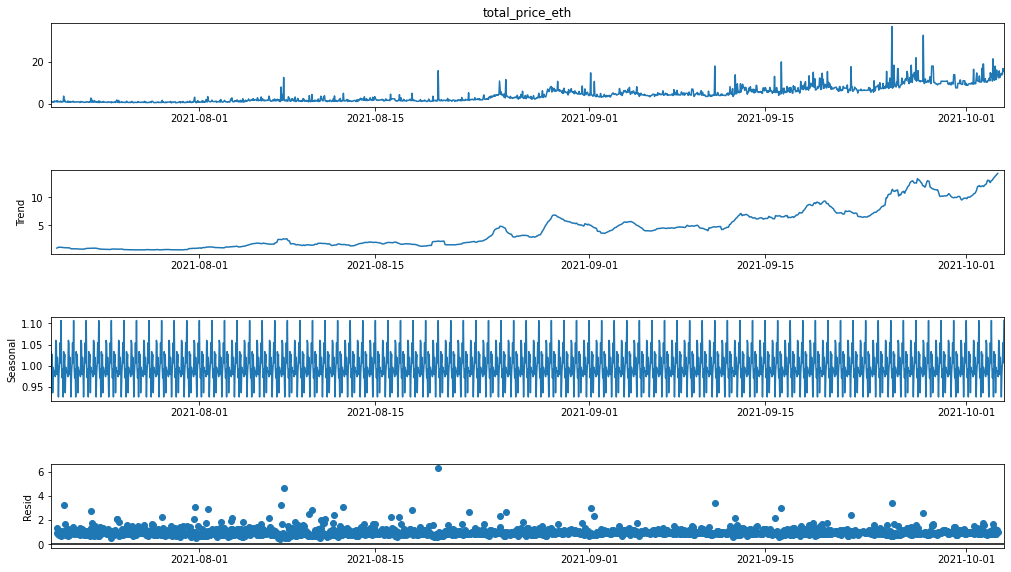

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [104]:
from pmdarima.arima import auto_arima

Autoarima code: https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10067.211, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7886.645, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9058.568, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11599.849, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7552.740, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7372.684, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=7054.327, Time=1.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7054.079, Time=1.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7055.217, Time=0.86 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7055.368, Time=2.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7053.858, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=8588.370, Time=0.44 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=7054.499, Time=1.55 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=8362.531, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0] interce

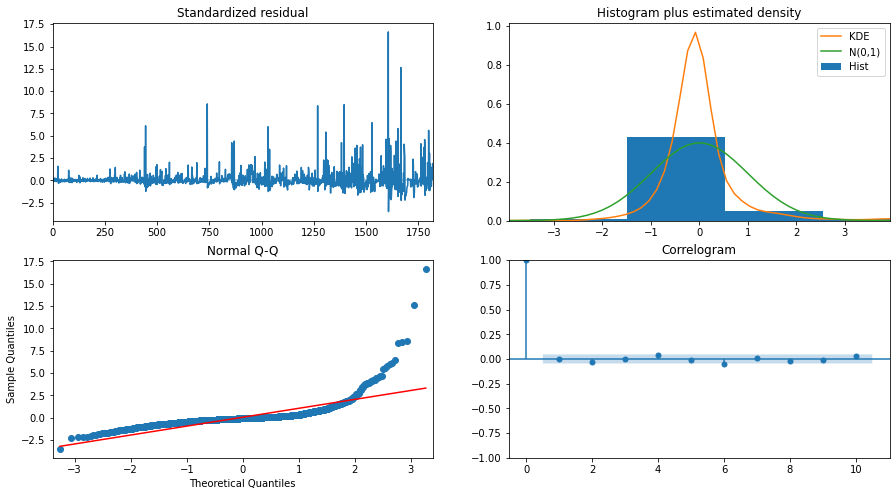

In [171]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [139]:
#SARIMAX(1, 0, 2) are parameters suggested by auto-arima

ar_2 = ARIMA(train, order=(1, 0, 2)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar2preds = ar_2.predict(typ='levels')

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [137]:
train

created_date
2021-07-20 04:00:00     0.944952
2021-07-20 05:00:00     1.022286
2021-07-20 06:00:00     1.040000
2021-07-20 07:00:00     0.835000
2021-07-20 08:00:00     0.923333
                         ...    
2021-10-03 20:00:00    14.566250
2021-10-03 21:00:00    13.940000
2021-10-03 22:00:00    16.850000
2021-10-03 23:00:00    15.707500
2021-10-04 00:00:00    15.426633
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

In [141]:
np.sqrt(mean_squared_error(train, ar2preds))

1.67685108421391

So far our RMSE has improved and our predictions are looking relatively good but I want to try differencing in advance and see if we can improve even further.


In [142]:
ar_2_diff = ARIMA(train_diff, order=(1, 0, 2)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar2diffpreds = ar_2_diff.predict(typ='levels')

In [143]:
np.sqrt(mean_squared_error(train_diff, ar2diffpreds))

1.6704352919031182

In [145]:
train

created_date
2021-07-20 04:00:00     0.944952
2021-07-20 05:00:00     1.022286
2021-07-20 06:00:00     1.040000
2021-07-20 07:00:00     0.835000
2021-07-20 08:00:00     0.923333
                         ...    
2021-10-03 20:00:00    14.566250
2021-10-03 21:00:00    13.940000
2021-10-03 22:00:00    16.850000
2021-10-03 23:00:00    15.707500
2021-10-04 00:00:00    15.426633
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

In [144]:
test

created_date
2021-10-04 01:00:00    13.683334
2021-10-04 02:00:00    19.531667
2021-10-04 03:00:00    15.898572
2021-10-04 04:00:00    15.166634
2021-10-04 05:00:00    14.990000
                         ...    
2021-10-22 19:00:00    10.650000
2021-10-22 20:00:00     7.230000
2021-10-22 21:00:00     8.063333
2021-10-22 22:00:00     9.800000
2021-10-22 23:00:00     7.500000
Freq: H, Name: total_price_eth, Length: 455, dtype: float64

In [148]:
#our test set has 455 observations, lets forecast using our current model ar_2
first_forecast = ar_2.forecast(455, alpha=0.05)
first_forecast_series = pd.Series(first_forecast, index=test.index)

<AxesSubplot:xlabel='created_date'>

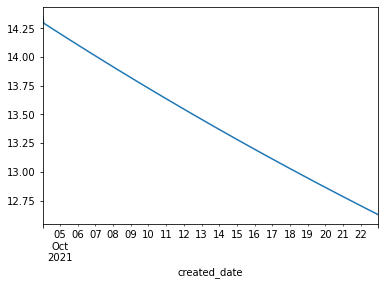

In [154]:
first_forecast_series.plot()

In [149]:
first_forecast_series

created_date
2021-10-04 01:00:00    14.349383
2021-10-04 02:00:00    14.293359
2021-10-04 03:00:00    14.289223
2021-10-04 04:00:00    14.285089
2021-10-04 05:00:00    14.280957
                         ...    
2021-10-22 19:00:00    12.642840
2021-10-22 20:00:00    12.639591
2021-10-22 21:00:00    12.636344
2021-10-22 22:00:00    12.633098
2021-10-22 23:00:00    12.629854
Freq: H, Name: predicted_mean, Length: 455, dtype: float64

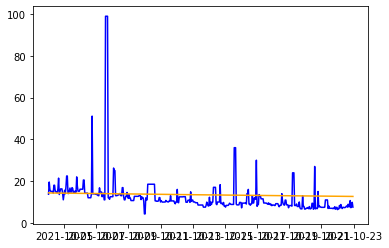

In [155]:
plt.plot(test, color="blue")
plt.plot(first_forecast_series, color="orange")

Seeing these results makes me think that the mean might not be the best metric to measure the daily sales. 
There seems to still be random spikes of very high prices showing up in our predictions.
I think the median may be more appropriate for this problem. I am going to start the process over now.

In [157]:
coolcatshour_median = coolcats_df_viz["total_price_eth"].resample('H').median()

In [158]:
coolcatshour_median

created_date
2021-07-20 04:00:00     0.833
2021-07-20 05:00:00     0.929
2021-07-20 06:00:00     0.920
2021-07-20 07:00:00     0.835
2021-07-20 08:00:00     0.870
                        ...  
2021-10-22 19:00:00    10.650
2021-10-22 20:00:00     7.230
2021-10-22 21:00:00     8.000
2021-10-22 22:00:00     9.800
2021-10-22 23:00:00     7.500
Freq: H, Name: total_price_eth, Length: 2276, dtype: float64

In [161]:
coolcats_med_bfill = coolcatshour_median.bfill()

<AxesSubplot:xlabel='created_date'>

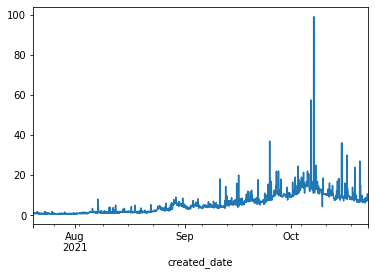

In [163]:
coolcats_med_bfill.plot()

In [164]:
adfuller(coolcats_med_bfill)

(-2.0079596246180107,
 0.2830940236681513,
 21,
 2254,
 {'1%': -3.43325450880204,
  '5%': -2.862823135013053,
  '10%': -2.567453072861103},
 11449.038705980016)

In [170]:
coolcats_med_bfill.sort_values(ascending=False)[:20]

created_date
2021-10-07 13:00:00    99.000001
2021-10-07 14:00:00    99.000001
2021-10-06 18:00:00    57.499999
2021-09-25 02:00:00    36.941999
2021-10-15 12:00:00    36.000001
2021-10-15 11:00:00    36.000001
2021-10-15 13:00:00    36.000001
2021-10-15 14:00:00    36.000001
2021-10-15 10:00:00    36.000001
2021-10-16 23:00:00    30.000001
2021-10-16 22:00:00    30.000001
2021-10-20 14:00:00    26.999999
2021-10-08 03:00:00    25.000001
2021-10-03 03:00:00    24.495000
2021-10-19 05:00:00    23.950000
2021-09-27 14:00:00    22.000001
2021-10-05 19:00:00    22.000001
2021-09-27 00:00:00    22.000001
2021-10-04 16:00:00    21.400000
2021-10-06 01:00:00    20.500000
Name: total_price_eth, dtype: float64

In [172]:
coolcats_med_bfill

# find the index which allows us to split off 20% of the data
cutoff = round(hourly_data_final.shape[0]*0.8)

median_train = coolcats_med_bfill[:cutoff]
median_test = coolcats_med_bfill[cutoff:]

<AxesSubplot:xlabel='created_date'>

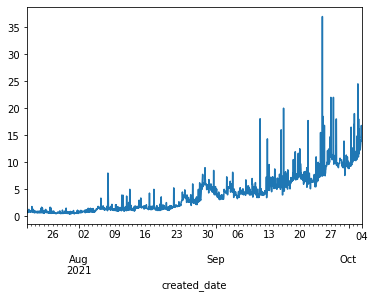

In [174]:
median_train.plot()

In [175]:
adfuller(median_train)

(0.5585332207066342,
 0.9865476743161646,
 22,
 1798,
 {'1%': -3.4339921916016345,
  '5%': -2.8631488249300574,
  '10%': -2.5676264862577503},
 6393.052303513305)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7409.663, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7017.151, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6465.285, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7407.695, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6459.133, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6458.553, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6817.052, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6460.230, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6459.865, Time=1.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6461.187, Time=1.00 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6669.901, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6461.455, Time=2.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6460.312, Time=0.26 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 7.877 seconds
                      

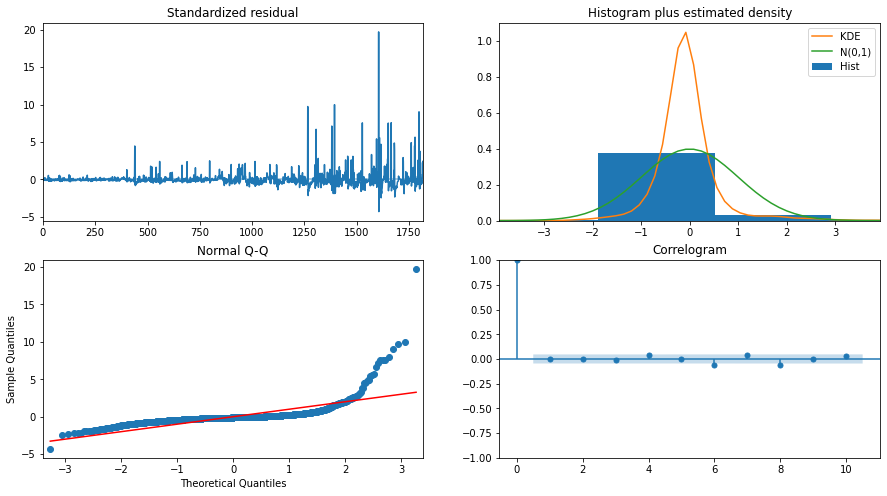

In [176]:
model_autoARIMA = auto_arima(median_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [177]:
ar_3_median = ARIMA(median_train, order=(2, 1, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar3preds = ar_3_median.predict(typ='levels')

In [178]:
ar3preds

created_date
2021-07-20 04:00:00     0.000000
2021-07-20 05:00:00     0.832999
2021-07-20 06:00:00     0.886612
2021-07-20 07:00:00     0.893375
2021-07-20 08:00:00     0.872726
                         ...    
2021-10-03 20:00:00    13.082668
2021-10-03 21:00:00    13.200908
2021-10-03 22:00:00    13.249818
2021-10-03 23:00:00    13.837152
2021-10-04 00:00:00    13.623433
Freq: H, Name: predicted_mean, Length: 1821, dtype: float64

In [180]:
np.sqrt(mean_squared_error(median_train, ar3preds))

1.4234390777968138

Our RMSE is still improving which is great. I want to see what these predictions look like compared to our data first, and then create a forecast afterwards.

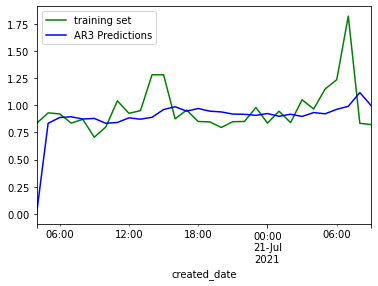

In [182]:
#beginning of our training set zoomed into first 30
fig, ax = plt.subplots()
median_train[0:30].plot(ax=ax, c='g', label='training set')
ar3preds[0:30].plot(ax=ax, c='b', label='AR3 Predictions')
ax.legend();

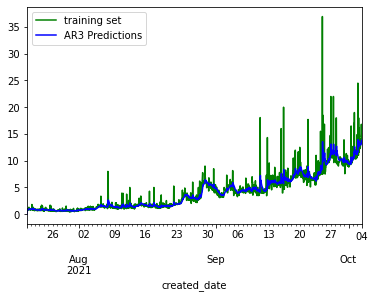

In [183]:
#full training vs predictions comparison
fig, ax = plt.subplots()
median_train.plot(ax=ax, c='g', label='training set')
ar3preds.plot(ax=ax, c='b', label='AR3 Predictions')
ax.legend();

I feel pretty good about these comparisons so far. I am going to next create a new forecast to validate the performance of this model. 

In [184]:
median_test

created_date
2021-10-04 01:00:00    13.590000
2021-10-04 02:00:00    18.995001
2021-10-04 03:00:00    14.950000
2021-10-04 04:00:00    15.000001
2021-10-04 05:00:00    14.990000
                         ...    
2021-10-22 19:00:00    10.650000
2021-10-22 20:00:00     7.230000
2021-10-22 21:00:00     8.000000
2021-10-22 22:00:00     9.800000
2021-10-22 23:00:00     7.500000
Freq: H, Name: total_price_eth, Length: 455, dtype: float64

In [185]:
#our test set has 455 observations, lets forecast using our current model ar_2
median_forecast = ar_3_median.forecast(455, alpha=0.05)
median_forecast_series = pd.Series(median_forecast, index=test.index)

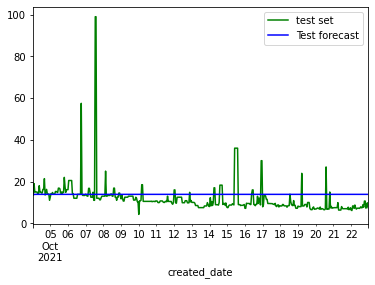

In [189]:
#full training vs predictions comparison
fig, ax = plt.subplots()
median_test.plot(ax=ax, c='g', label='test set')
median_forecast_series.plot(ax=ax, c='b', label='Test forecast')
ax.legend();

In [190]:
np.sqrt(mean_squared_error(median_test, median_forecast_series))

7.914116965641573

<AxesSubplot:xlabel='created_date'>

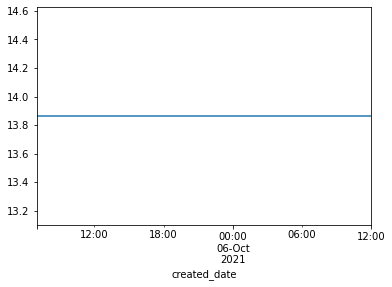

In [199]:
median_forecast_series[30:60].plot()

These predictions are shockingly bad on our test set. I am going to try differencing here.

In [202]:
median_train_diff = median_train.diff()

In [203]:
median_test_diff = median_test.diff()

In [204]:
ar_3_median_diff = ARIMA(median_train_diff, order=(2, 1, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar3diffpreds = ar_3_median_diff.predict(typ='levels')

In [209]:
median_train_diff

created_date
2021-07-20 04:00:00      NaN
2021-07-20 05:00:00    0.096
2021-07-20 06:00:00   -0.009
2021-07-20 07:00:00   -0.085
2021-07-20 08:00:00    0.035
                       ...  
2021-10-03 20:00:00    0.465
2021-10-03 21:00:00   -0.200
2021-10-03 22:00:00    2.850
2021-10-03 23:00:00   -2.360
2021-10-04 00:00:00    0.550
Freq: H, Name: total_price_eth, Length: 1821, dtype: float64

In [210]:
ar3diffpreds

created_date
2021-07-20 04:00:00    0.000000
2021-07-20 05:00:00    0.000000
2021-07-20 06:00:00    0.095999
2021-07-20 07:00:00    0.057167
2021-07-20 08:00:00    0.052363
                         ...   
2021-10-03 20:00:00   -0.467982
2021-10-03 21:00:00   -0.479812
2021-10-03 22:00:00   -0.019984
2021-10-03 23:00:00   -1.584640
2021-10-04 00:00:00    0.470615
Freq: H, Name: predicted_mean, Length: 1821, dtype: float64

In [211]:
np.sqrt(mean_squared_error(median_train_diff.dropna(), ar3diffpreds[1:]))

1.5713684125442002

In [212]:
median_test_diff

created_date
2021-10-04 01:00:00         NaN
2021-10-04 02:00:00    5.405001
2021-10-04 03:00:00   -4.045000
2021-10-04 04:00:00    0.050000
2021-10-04 05:00:00   -0.010000
                         ...   
2021-10-22 19:00:00    0.000000
2021-10-22 20:00:00   -3.420000
2021-10-22 21:00:00    0.770000
2021-10-22 22:00:00    1.800000
2021-10-22 23:00:00   -2.300000
Freq: H, Name: total_price_eth, Length: 455, dtype: float64

In [213]:
median_diff_forecast = ar_3_median_diff.forecast(455, alpha=0.05)
median_diff_forecast_series = pd.Series(median_diff_forecast, index=test.index)

In [215]:
np.sqrt(mean_squared_error(median_test_diff.dropna(), median_diff_forecast_series[1:]))

7.380815795803471

The test set forecasting is still really off. Something is telling me that hourly data may be the issue here. 

Considering a large sale for a "rare" could happen at any point, and it could be the only sale of the hour - this probably happens a lot.
And this is probably throwing off our predictions.
Maybe I make it a daily median prediction. This may be more feasible and honestly, more useful.
Because flipping an NFT in an hour is not a reasonable goal.

### Modeling with Daily Data

In [216]:
coolcats_daily = coolcats_df["total_price_eth"].resample("D").median()

<AxesSubplot:xlabel='created_date'>

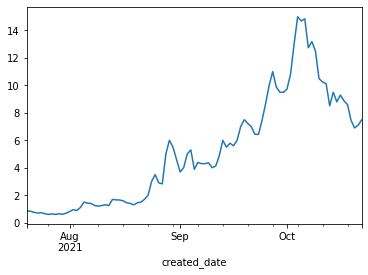

In [217]:
coolcats_daily.plot()

In [218]:
coolcats_daily

created_date
2021-07-20    0.8500
2021-07-21    0.8333
2021-07-22    0.7500
2021-07-23    0.7000
2021-07-24    0.7300
               ...  
2021-10-18    8.6000
2021-10-19    7.4500
2021-10-20    6.9000
2021-10-21    7.1000
2021-10-22    7.5000
Freq: D, Name: total_price_eth, Length: 95, dtype: float64

Turning this into a daily dataset significantly reduces our data points, but for model exploration I am going to keep using this and see how it performs.

In [219]:
adfuller(coolcats_daily)

(-1.3100729058811462,
 0.6245514395566076,
 1,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 190.35598671836703)

In [221]:
#split daily into train and test

# find the index which allows us to split off 20% of the data
cutoff = round(coolcats_daily.shape[0]*0.8)

daily_train = coolcats_daily[:cutoff]
daily_test = coolcats_daily[cutoff:]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=143.886, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=138.474, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=133.441, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=146.920, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=135.415, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=135.356, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=134.352, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=134.604, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.653 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -63.720
Date:                Wed, 01 Dec 2021   AIC                            133.441
Time:                        17:17:58   BIC 

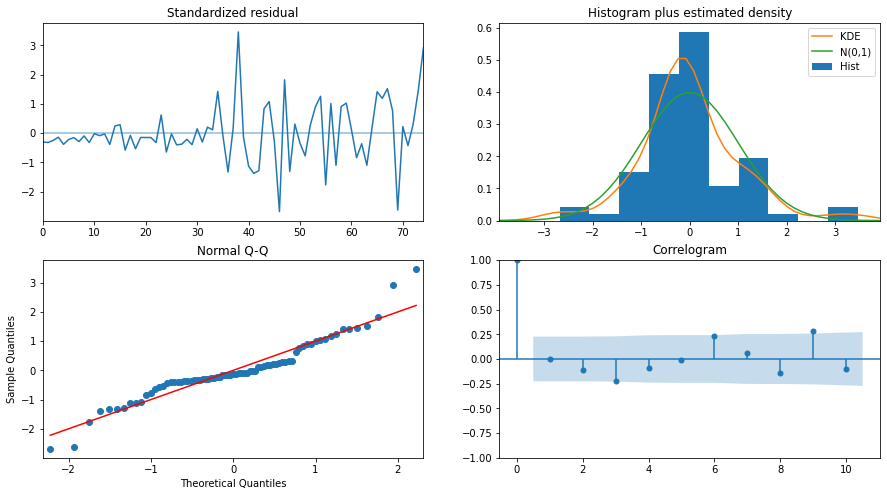

In [222]:
model_autoARIMA = auto_arima(daily_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [227]:
daily_ar_1 = ARIMA(daily_train, order=(0, 1, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
daily_1_preds = daily_ar_1.predict(typ='levels')

In [228]:
daily_1_preds

created_date
2021-07-20     0.000000
2021-07-21     0.850000
2021-07-22     0.826799
2021-07-23     0.714764
2021-07-24     0.693003
                ...    
2021-09-29     9.228998
2021-09-30     9.629635
2021-10-01     9.423206
2021-10-02     9.869364
2021-10-03    11.245173
Freq: D, Name: predicted_mean, Length: 76, dtype: float64

In [229]:
np.sqrt(mean_squared_error(daily_train, daily_1_preds))

0.5813913119559982

This is the best score so far... Wondering how it will perform on test data.

In [233]:
len(daily_test)

19

In [238]:
ar1_forecast = daily_ar_1.forecast(19, alpha=0.05)
ar1_forecast_results = pd.Series(ar1_forecast, index=daily_test.index)

In [243]:
ar1_forecast_results

created_date
2021-10-04    13.839427
2021-10-05    13.839427
2021-10-06    13.839427
2021-10-07    13.839427
2021-10-08    13.839427
2021-10-09    13.839427
2021-10-10    13.839427
2021-10-11    13.839427
2021-10-12    13.839427
2021-10-13    13.839427
2021-10-14    13.839427
2021-10-15    13.839427
2021-10-16    13.839427
2021-10-17    13.839427
2021-10-18    13.839427
2021-10-19    13.839427
2021-10-20    13.839427
2021-10-21    13.839427
2021-10-22    13.839427
Freq: D, Name: predicted_mean, dtype: float64

In [241]:
np.sqrt(mean_squared_error(daily_test, ar1_forecast_results))

4.37929167437021

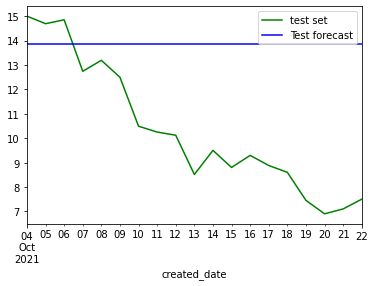

In [242]:
#full training vs predictions comparison
fig, ax = plt.subplots()
daily_test.plot(ax=ax, c='g', label='test set')
ar1_forecast_results.plot(ax=ax, c='b', label='Test forecast')
ax.legend();

In [251]:
forecast = daily_ar_1.forecast(steps=7)[1]

In [252]:
forecast

13.839427180985945

In [255]:
daily_diff = coolcats_daily.diff().dropna()

In [256]:
adfuller(daily_diff)

(-7.4833361009858175,
 4.7090598829015485e-11,
 0,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 189.27896902260977)

<AxesSubplot:xlabel='created_date'>

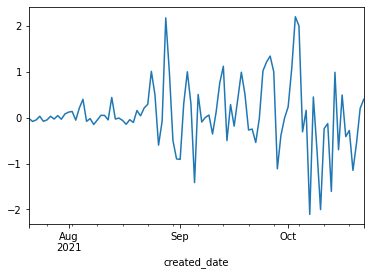

In [257]:
daily_diff.plot()

In [ ]:
#try differencing after train and test split

In [275]:
cutoff = round(daily_diff.shape[0]*0.8)

daily_train = daily_diff[:cutoff]
daily_test = daily_diff[cutoff:]

In [270]:
train_diff = daily_train.diff().dropna()
test_diff = daily_test.diff().dropna()

<AxesSubplot:xlabel='created_date'>

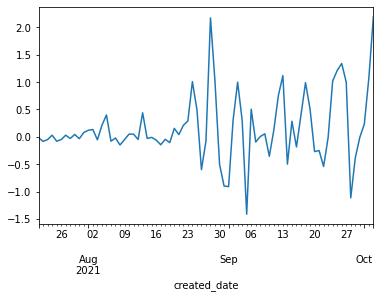

In [276]:
daily_train.plot()

In [278]:
adfuller(daily_test)

(-6.189950052944616,
 6.157388796529702e-08,
 0,
 18,
 {'1%': -3.859073285322359,
  '5%': -3.0420456927297668,
  '10%': -2.6609064197530863},
 25.641246567290107)

In [279]:
#More Data Exploration to see if this ultimately improves model
coolcats_df["total_price_eth"]

created_date
2021-07-20 04:00:16.046520     0.980
2021-07-20 04:03:27.737959     0.929
2021-07-20 04:12:51.292764     0.990
2021-07-20 04:13:29.909525     0.900
2021-07-20 04:15:36.898508     0.860
                               ...  
2021-10-22 21:42:21.243043     8.000
2021-10-22 21:58:06.614580     8.500
2021-10-22 22:09:51.133094     9.600
2021-10-22 22:46:39.290488    10.000
2021-10-22 23:06:06.671899     7.500
Name: total_price_eth, Length: 10289, dtype: float64

In [281]:
#try resampling to every 4 hours, instead of median, i am going to do .min() because ultimately,
#the minimum price sold in that period is a great way to set expectations for sales

cc_4hour = coolcats_df["total_price_eth"].resample('4H').min()

In [282]:
cc_4hour 

created_date
2021-07-20 04:00:00    0.6710
2021-07-20 08:00:00    0.5000
2021-07-20 12:00:00    0.8300
2021-07-20 16:00:00    0.6740
2021-07-20 20:00:00    0.7800
                        ...  
2021-10-22 04:00:00    6.7444
2021-10-22 08:00:00    7.1000
2021-10-22 12:00:00    7.3000
2021-10-22 16:00:00    7.7000
2021-10-22 20:00:00    6.9600
Freq: 4H, Name: total_price_eth, Length: 569, dtype: float64

<AxesSubplot:xlabel='created_date'>

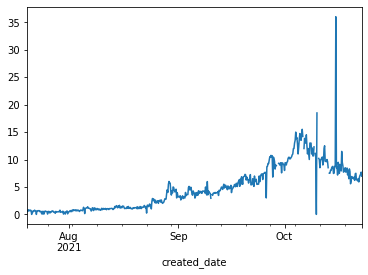

In [283]:
cc_4hour.plot()

In [284]:
cc_4hour.sort_values()

created_date
2021-07-21 12:00:00    1.000000e-11
2021-07-22 20:00:00    1.950000e-09
2021-10-10 00:00:00    1.000000e-03
2021-07-30 12:00:00    5.700000e-02
2021-07-26 00:00:00    6.190000e-02
                           ...     
2021-10-06 08:00:00             NaN
2021-10-09 12:00:00             NaN
2021-10-10 08:00:00             NaN
2021-10-10 12:00:00             NaN
2021-10-13 12:00:00             NaN
Name: total_price_eth, Length: 569, dtype: float64

In [288]:
cc_4hour.isna().sum()

9

In [295]:
adfuller(cc_4hour.dropna())

(-1.2307184594438474,
 0.6602438207597598,
 9,
 550,
 {'1%': -3.442295604706236,
  '5%': -2.866809328264463,
  '10%': -2.569576376859504},
 2045.7751202749223)

Only 9 periods where no sales occurred within a 4 hour timespan, we can fill these with forward fill/backfill or interpolate. Trying these all leads to backfill once again being the best for this data (improves the dickey test though marginally).

In [293]:
adfuller(cc_4hour.bfill())

(-1.2508029503071794,
 0.6513690044611072,
 9,
 559,
 {'1%': -3.442102384299813,
  '5%': -2.8667242618524233,
  '10%': -2.569531046591633},
 2076.191254550364)

In [296]:
cc_4hr = cc_4hour.bfill()

In [301]:
fourhourdiff = cc_4hr.diff().dropna()

In [302]:
adfuller(fourhourdiff)

(-12.040933065997429,
 2.7333260503927594e-22,
 8,
 559,
 {'1%': -3.442102384299813,
  '5%': -2.8667242618524233,
  '10%': -2.569531046591633},
 2073.07555638799)

In [303]:
# find the index which allows us to split off 20% of the data
cutoff = round(fourhourdiff.shape[0]*0.8)

four_train = fourhourdiff[:cutoff]
four_test = fourhourdiff[cutoff:]

In [304]:
adfuller(four_train)

(-5.799290285631618,
 4.671770683574977e-07,
 14,
 439,
 {'1%': -3.4453339386510784,
  '5%': -2.868146269723016,
  '10%': -2.5702889034926137},
 739.1349468607589)

In [305]:
adfuller(four_test)

(-7.269951479068229,
 1.5980665156214303e-10,
 5,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 543.5100156910694)

Finally we have training and test data that remains stationary after splitting. I think the size of this dataset is very appropriate for our modeling and we may see better results this time around.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=915.896, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=809.065, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=776.016, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=914.663, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=776.667, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=776.517, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=778.169, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=779.015, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.083 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  454
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -385.008
Date:                Wed, 01 Dec 2021   AIC                            776.016
Time:                        19:24:00   BIC 

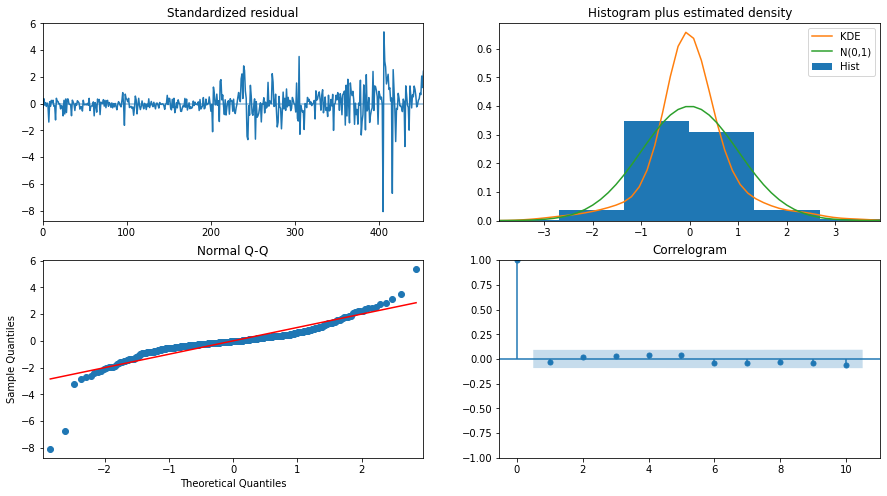

In [306]:
model_autoARIMA = auto_arima(four_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [310]:
four_model_1 = ARIMA(four_train, order=(0, 0, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
four_model1_preds = four_model_1.predict(typ='levels')

In [311]:
np.sqrt(mean_squared_error(four_train, four_model1_preds))

0.5647878524020968

In [312]:
four_test

created_date
2021-10-04 00:00:00    0.490001
2021-10-04 04:00:00    1.500000
2021-10-04 08:00:00   -1.190000
2021-10-04 12:00:00    0.200000
2021-10-04 16:00:00   -1.200000
                         ...   
2021-10-22 04:00:00    0.833400
2021-10-22 08:00:00    0.355600
2021-10-22 12:00:00    0.200000
2021-10-22 16:00:00    0.400000
2021-10-22 20:00:00   -0.740000
Freq: 4H, Name: total_price_eth, Length: 114, dtype: float64

Best score yet so far. But now I need to figure out how to get a great forecast. 

In [318]:
four_1_forecast = four_model_1.forecast(114, alpha=0.05)
four_1_forecast_results = pd.Series(four_1_forecast, index=four_test.index)

In [319]:
four_1_forecast_results

created_date
2021-10-04 00:00:00   -0.765105
2021-10-04 04:00:00    0.025528
2021-10-04 08:00:00    0.025528
2021-10-04 12:00:00    0.025528
2021-10-04 16:00:00    0.025528
                         ...   
2021-10-22 04:00:00    0.025528
2021-10-22 08:00:00    0.025528
2021-10-22 12:00:00    0.025528
2021-10-22 16:00:00    0.025528
2021-10-22 20:00:00    0.025528
Freq: 4H, Name: predicted_mean, Length: 114, dtype: float64

In [320]:
np.sqrt(mean_squared_error(four_test, four_1_forecast_results))

4.346501431488702

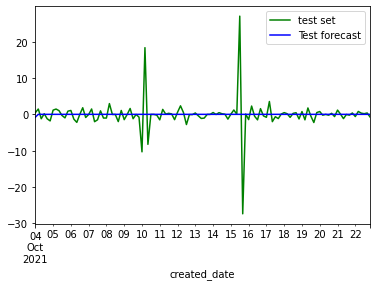

In [321]:
#full test vs forecast
fig, ax = plt.subplots()
four_test.plot(ax=ax, c='g', label='test set')
four_1_forecast_results.plot(ax=ax, c='b', label='Test forecast')
ax.legend();

Another nope. 

<AxesSubplot:xlabel='created_date'>

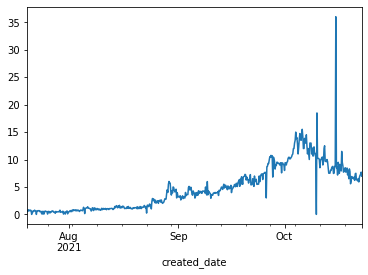

In [345]:
cc_4hr.plot()

In [348]:
cc_4hr.sort_values(ascending=False)[:10]

created_date
2021-10-15 12:00:00    36.000001
2021-10-10 04:00:00    18.480000
2021-10-06 00:00:00    15.500000
2021-10-04 04:00:00    14.990000
2021-10-05 08:00:00    14.730000
2021-10-07 04:00:00    14.500000
2021-10-05 12:00:00    14.439999
2021-10-05 20:00:00    14.400000
2021-10-06 04:00:00    14.200000
2021-10-04 12:00:00    14.000000
Name: total_price_eth, dtype: float64

In [344]:
adfuller(cc_4hr)

(-1.2508029503071794,
 0.6513690044611072,
 9,
 559,
 {'1%': -3.442102384299813,
  '5%': -2.8667242618524233,
  '10%': -2.569531046591633},
 2076.191254550364)

In [343]:
# find the index which allows us to split off 20% of the data
cutoff = round(cc_4hr.shape[0]*0.8)

four_train = cc_4hr[:cutoff]
four_test = cc_4hr[cutoff:]

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_price_eth', ylabel='Density'>

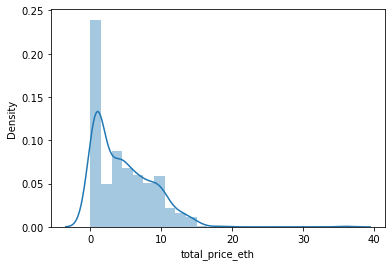

In [350]:
sns.distplot(cc_4hr)

<Figure size 432x288 with 0 Axes>

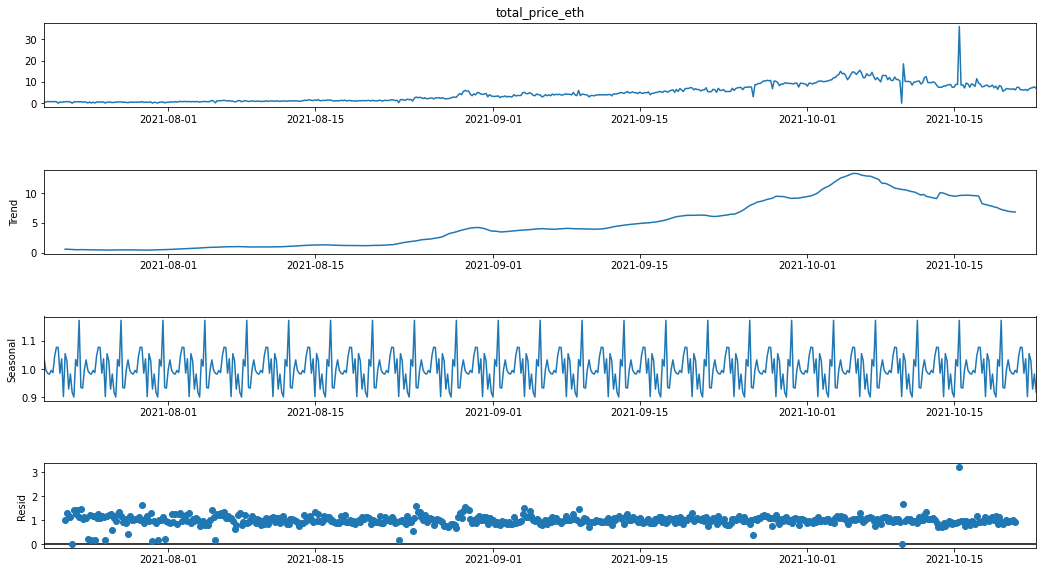

In [351]:
result = seasonal_decompose(cc_4hr, model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=915.896, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=809.065, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=776.016, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=914.663, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=776.667, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=776.517, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=778.169, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=779.015, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.130 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  455
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -385.008
Date:                Wed, 01 Dec 2021   AIC                            776.016
Time:                        20:22:28   BIC 

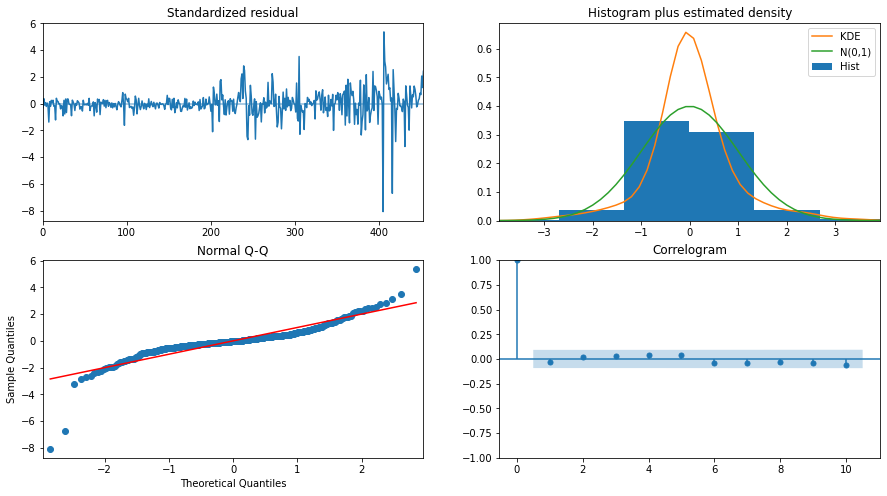

In [352]:
model_autoARIMA = auto_arima(four_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [354]:
four_model_2 = ARIMA(four_train, order=(0, 1, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
four_model2_preds = four_model_2.predict(typ='levels')

In [355]:
np.sqrt(mean_squared_error(four_train, four_model2_preds))

0.5681645818663413

In [356]:
len(four_test)

114

In [365]:
four2_forecast = four_model_2.forecast(114, alpha=0.3)
four2_forecast_results = pd.Series(four2_forecast, index=four_test.index)

<AxesSubplot:xlabel='created_date'>

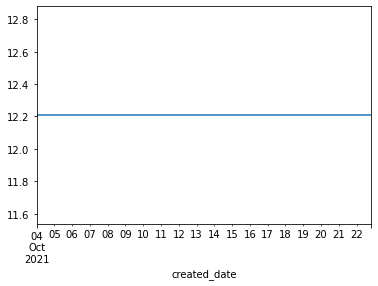

In [366]:
four2_forecast_results.plot()

In [367]:
np.sqrt(mean_squared_error(four_test, four2_forecast_results))

4.351769968959002

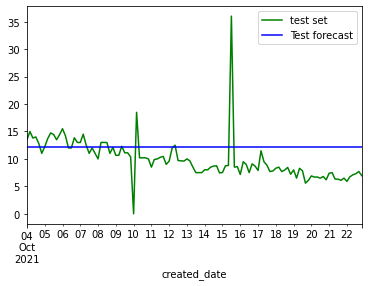

In [368]:
#full test vs forecast
fig, ax = plt.subplots()
four_test.plot(ax=ax, c='g', label='test set')
four2_forecast_results.plot(ax=ax, c='b', label='Test forecast')
ax.legend();

### Note: Need to figure out why forecasts only print one predicted mean

In [392]:
from fbprophet import Prophet

In [393]:
four_train

created_date
2021-07-20 04:00:00     0.671000
2021-07-20 08:00:00     0.500000
2021-07-20 12:00:00     0.830000
2021-07-20 16:00:00     0.674000
2021-07-20 20:00:00     0.780000
                         ...    
2021-10-03 04:00:00    10.850001
2021-10-03 08:00:00    11.000000
2021-10-03 12:00:00    11.970000
2021-10-03 16:00:00    12.000000
2021-10-03 20:00:00    13.000000
Freq: 4H, Name: total_price_eth, Length: 455, dtype: float64

In [395]:
df = pd.DataFrame({"ds": four_train.index, "y": four_train})

In [396]:
df

,ds,y
created_date,,
2021-07-20 04:00:00,2021-07-20 04:00:00,0.671000
2021-07-20 08:00:00,2021-07-20 08:00:00,0.500000
2021-07-20 12:00:00,2021-07-20 12:00:00,0.830000
2021-07-20 16:00:00,2021-07-20 16:00:00,0.674000
2021-07-20 20:00:00,2021-07-20 20:00:00,0.780000
...,...,...
2021-10-03 04:00:00,2021-10-03 04:00:00,10.850001
2021-10-03 08:00:00,2021-10-03 08:00:00,11.000000
2021-10-03 12:00:00,2021-10-03 12:00:00,11.970000


In [397]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [400]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-20 04:00:00,0.331744,-0.411064,1.297025,0.331744,0.331744,0.109555,0.109555,0.109555,0.053556,0.053556,0.053556,0.055998,0.055998,0.055998,0.0,0.0,0.0,0.441299
1,2021-07-20 08:00:00,0.336777,-0.456059,1.246309,0.336777,0.336777,0.046513,0.046513,0.046513,0.015073,0.015073,0.015073,0.031440,0.031440,0.031440,0.0,0.0,0.0,0.383290
2,2021-07-20 12:00:00,0.341811,-0.433655,1.255332,0.341811,0.341811,0.049081,0.049081,0.049081,0.032646,0.032646,0.032646,0.016435,0.016435,0.016435,0.0,0.0,0.0,0.390892
3,2021-07-20 16:00:00,0.346844,-0.603766,1.145644,0.346844,0.346844,-0.053099,-0.053099,-0.053099,-0.059546,-0.059546,-0.059546,0.006447,0.006447,0.006447,0.0,0.0,0.0,0.293745
4,2021-07-20 20:00:00,0.351877,-0.481128,1.169760,0.351877,0.351877,-0.032594,-0.032594,-0.032594,-0.028753,-0.028753,-0.028753,-0.003841,-0.003841,-0.003841,0.0,0.0,0.0,0.319284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2022-01-07 20:00:00,41.439321,32.522191,49.953339,32.853056,50.109129,-0.165769,-0.165769,-0.165769,-0.028753,-0.028753,-0.028753,-0.137016,-0.137016,-0.137016,0.0,0.0,0.0,41.273552
551,2022-01-08 20:00:00,41.760769,32.913377,50.706233,33.030598,50.513219,0.045641,0.045641,0.045641,-0.028753,-0.028753,-0.028753,0.074394,0.074394,0.074394,0.0,0.0,0.0,41.806410
552,2022-01-09 20:00:00,42.082218,33.590051,51.567136,33.216107,50.973053,0.383870,0.383870,0.383870,-0.028753,-0.028753,-0.028753,0.412623,0.412623,0.412623,0.0,0.0,0.0,42.466088
553,2022-01-10 20:00:00,42.403667,33.444935,51.410035,33.399821,51.410849,0.113111,0.113111,0.113111,-0.028753,-0.028753,-0.028753,0.141864,0.141864,0.141864,0.0,0.0,0.0,42.516777


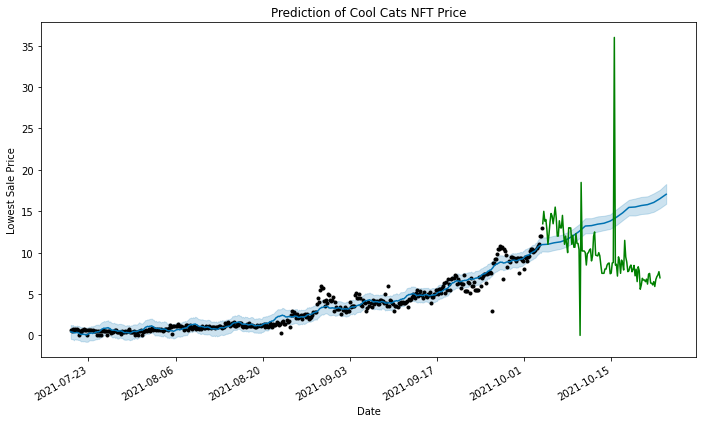

In [403]:
future = m.make_future_dataframe(periods=20) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
four_test.plot(c='g') #i am plotting the test values since they are real comparable data
plt.title("Prediction of Cool Cats NFT Price")
plt.xlabel("Date")
plt.ylabel("Lowest Sale Price")
plt.show()

In [413]:
prediction2 = pd.Series(prediction["trend"])

In [414]:
prediction2

0       0.331744
1       0.336777
2       0.341811
3       0.346844
4       0.351877
         ...    
470    15.723428
471    16.044876
472    16.366325
473    16.687774
474    17.009222
Name: trend, Length: 475, dtype: float64

In [417]:
name = input("Enter a name: ")
print(name)

Enter a name: hello
hello
